<center><b>Student: Ponmanikandan Velmurugan | Instructor : Mariam Salloum | TA : Haochen Zeng</b></center>

This example is based on the EDA example in Doing Data Science Ch. 2. There are 31 datasets named nyt1.csv, nyt2.csv,…,nyt31.csv, which you can find here: https://github.com/oreillymedia/doing_data_science. I have already downloaded the dataset for you to use under the folder: /nytdata

Each file represents one (simulated) day’s worth of ads shown and clicks recorded on the New York Times home page in May 2012. Each row represents a single user. There are five columns: age, gender (0=female, 1=male), number impressions, number clicks, and logged-in.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets start off analyzing one file

In [2]:
df =  pd.read_csv("Datasets/nyt1.csv")
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


Once you have the data loaded, it’s time for some EDA:



Create a new variable, age_group, that categorizes users as "< 18", "18 - 24", "25 - 34", "35 - 44", "45 - 54", "55 - 64", and "65 +".

In [3]:
bins = [0, 18, 25, 35, 45, 55, 65, 109]
labels = ['< 18','18 - 24','25 - 34','35 - 44','45 - 54','55 - 64','65 +']
df['Age_Group'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

Text(0, 0.5, 'Frequency')

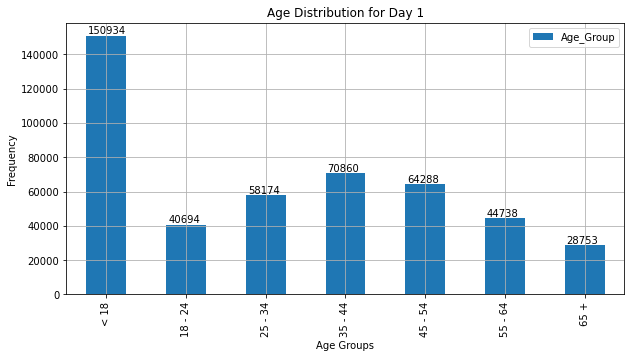

In [4]:
ax = df['Age_Group'].value_counts().sort_index().plot(kind = 'bar',
                                    grid = True,
                                    legend = True,
                                    figsize = (10, 5),
                                    title = 'Age Distribution for Day 1')
for i, v in enumerate(df['Age_Group'].value_counts().sort_index()):
    ax.text(i - 0.225, v + 1000, str(round(v, 2)))
ax.set_xlabel('Age Groups')
ax.set_ylabel('Frequency')

Plot the distributions of number impressions and click-through-rate for these six age categories.

In [5]:
#Plotting function for histograms based on Age Group
def Plot_Group_Hist_Distribution(target) : 
    num_plots = 0
    figure, axis = plt.subplots(3, 3)
    figure.tight_layout()

    for i in range(3) :
        for j in range (3) : 
            ax = df[df['Age_Group'] == labels[num_plots]][target].plot(kind = 'hist',
                                         ax = axis[i, j],
                                         grid = True,
                                         legend = True, 
                                         figsize = (20, 15),
                                         title = target + ' Distribution of Age ' + labels[num_plots])
            ax.set_xlabel(target)
            ax.set_ylabel('Frequency (#)')
            num_plots += 1

            if len(labels) == num_plots : 
                ax = df.groupby(['Age_Group'])[target].plot(kind = 'hist',
                                         ax = axis[i, j + 1],
                                         alpha = 0.5,
                                         grid = True,
                                         legend = True,
                                         figsize = (20, 15),
                                         title = 'All ' + target + ' Distribution')
                ax[0].set_xlabel(target)
                ax[0].set_ylabel('Frequency (#)')
                break

    figure.delaxes(axis[2][2])

In [6]:
#Plotting function for Bar graphs based on Age Group
def Plot_Group_Bar_Distribution(target) : 
    num_plots = 0
    figure, axis = plt.subplots(3, 3)
    figure.tight_layout()

    for i in range(3) :
        for j in range (3) : 
            ax = df[df['Age_Group'] == labels[num_plots]][target].value_counts().sort_index().plot(kind = 'bar',
                                         ax = axis[i, j],
                                         grid = True,
                                         legend = True, 
                                         figsize = (20, 18),
                                         title = target + ' Distribution of Age ' + labels[num_plots])
            
            for index, v in enumerate(df[df['Age_Group'] == labels[num_plots]][target].value_counts().sort_index()) :
                ax.text(index - 0.125, v + 500, str(round(v, 2)))
            ax.set_xlabel(target)
            ax.set_ylabel('Frequency (#)')
            
            num_plots += 1

            if len(labels) == num_plots : 
                ax = df.groupby(['Age_Group'])[target].value_counts().sort_index().plot(kind = 'bar',
                                         ax = axis[i, j + 1],
                                         grid = True,
                                         legend = True,
                                         figsize = (20, 15),
                                         title = 'All ' + target + ' Distribution')
                ax.set_ylabel('Frequency (#)')
                break

    figure.delaxes(axis[2][2])

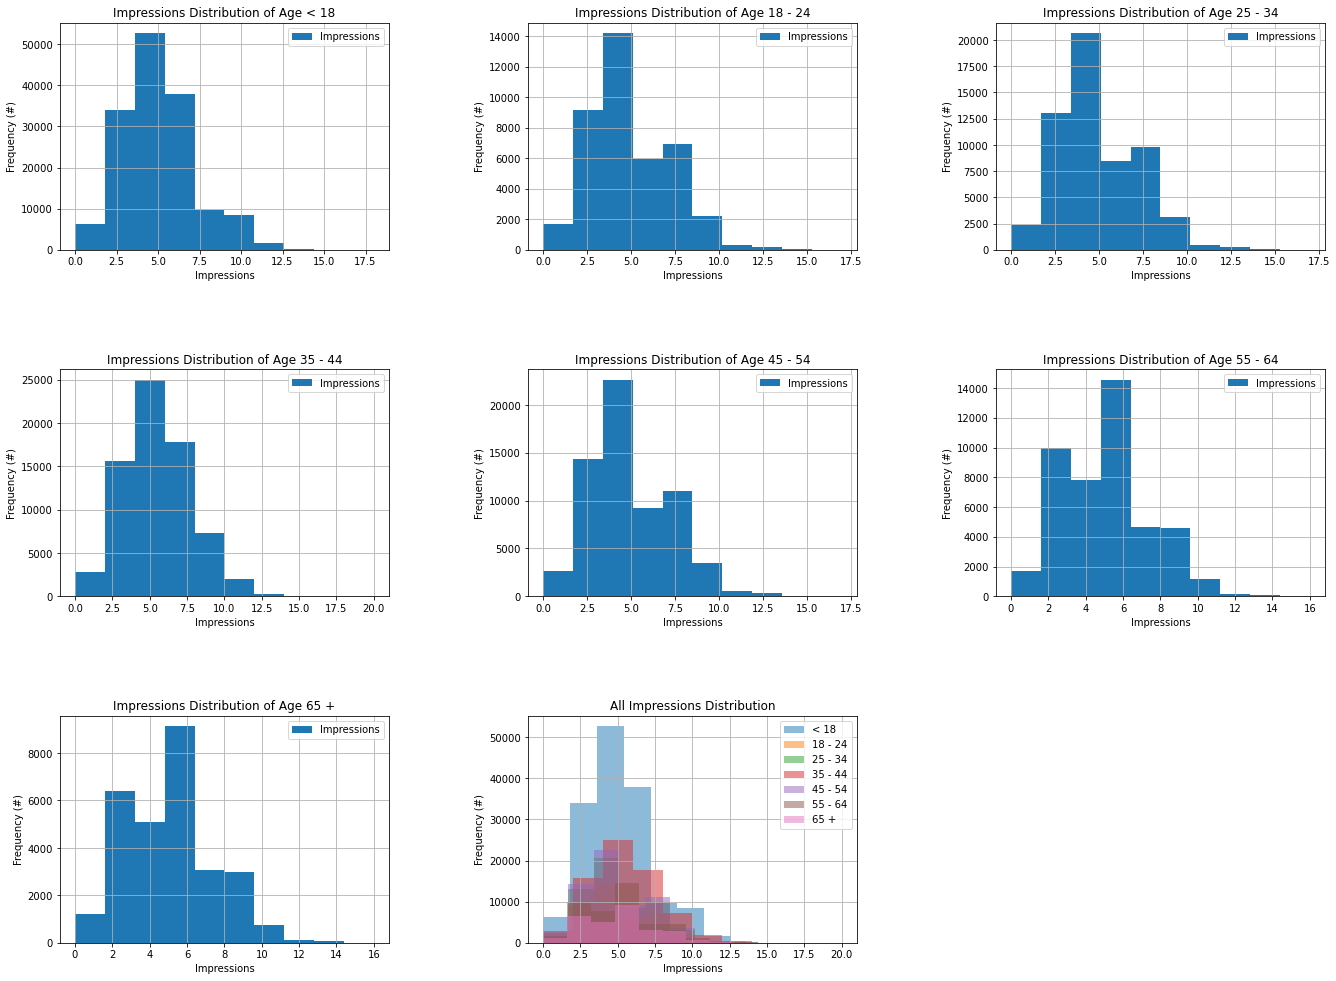

In [7]:
#Plotting distributiom of number of Impressions for Day 1
Plot_Group_Hist_Distribution('Impressions')

Almost all the age group follows ***normal distribution*** of impressions shown. This means that all the age group are almost shown equal number of Ad impressions. There is ***no targeted audience or discreminiation found in this particular analysis***.

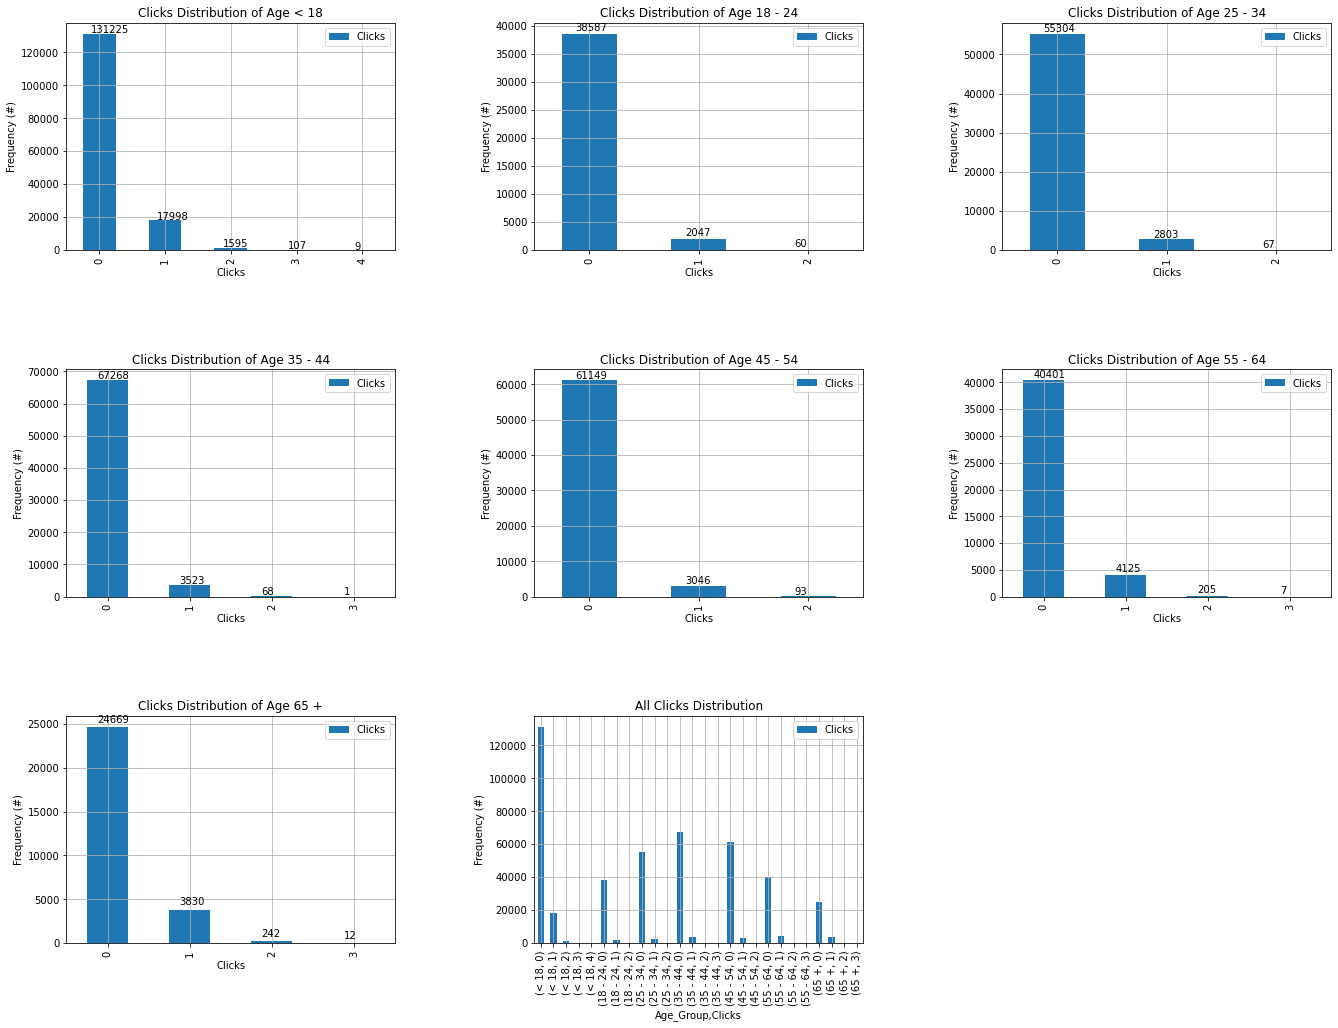

In [8]:
#Plotting distributiom of number of clicks for Day 1
Plot_Group_Bar_Distribution('Clicks')

From the above graphs, I can conclude Number of clicks follows ***positively skewed distribution***. This is because not many isers will click the Ads genrally or we can also ***conclude that the Ads are not relevant to this given population/traffic***.

**Note:** I found the combined graph unreadable (last one of the groups) so i also did the individual distribution separately. Plus, I found the ***histogram more expressive incase of impressions*** and ***bar graph more expressive incase of click rate***. The converse can be tried using : (not useful)


1. Plot_Group_Hist_Distribution('Clicks') - Approximation of information into buckets is not needed for small values

2. Plot_Group_Bar_Distribution('Impressions') - Difficult to read and interpret due to large possible values

***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***

Explore the data and make visual and quantitative comparisons across user segments/demographics (<18-year-old males versus < 18-year-old females or logged-in versus not, for example).

In [9]:
#Gathering Gender and Age based traffic information
female_traffic = df[df['Gender'] == 0].groupby(['Age_Group'])['Gender'].count().values.tolist()
male_traffic = df[df['Gender'] == 1].groupby(['Age_Group'])['Gender'].count().values.tolist()

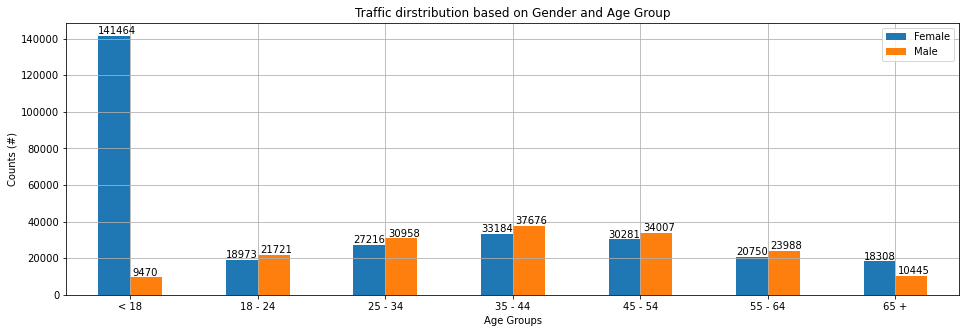

In [10]:
#Plotting the Traffic based on Gender and Age Groups
plotdata = pd.DataFrame({'Female' : female_traffic, 'Male' : male_traffic})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Traffic dirstribution based on Gender and Age Group')
for i, v in enumerate(female_traffic) :
    ax.text(i - 0.250, v + 1000, str(round(v, 1)))
for i, v in enumerate(male_traffic) :
    ax.text(i + 0.020, v + 1000, str(round(v, 1)))
ax.set_xlabel('Age Groups')
ax.set_xticklabels(labels = labels, rotation = 360)
ax.set_ylabel('Counts (#)')
print()

From the above graph, we can see infer that there are ***more females than males*** who visited the New York times during Day 1. Furthermore, The ***females in the age group < 18 are dominant*** (skewed distribution) than rest of the population/traffic. The rest of the age groups ***have almost similar number of males and females*** (seems like normal distribution).

In [11]:
#Plotting the Impressions count based on Age Group and Gender
female_impressions = df[(df['Gender'] == 0) & (df['Impressions'] != 0)].groupby('Age_Group')['Impressions'].sum().values.tolist()
male_impressions = df[(df['Gender'] == 1) & (df['Impressions'] != 0)].groupby('Age_Group')['Impressions'].sum().values.tolist()

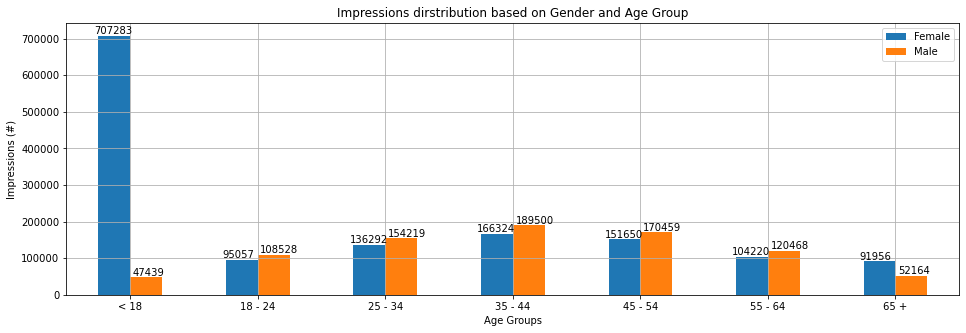

In [12]:
#Plotting the Impressions based on Gender and Age Groups
plotdata = pd.DataFrame({'Female' : female_impressions, 'Male' : male_impressions})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Impressions dirstribution based on Gender and Age Group')
for i, v in enumerate(female_impressions) :
    ax.text(i - 0.280, v + 5000, str(round(v, 1)))
for i, v in enumerate(male_impressions) :
    ax.text(i + 0.020, v + 5000, str(round(v, 1)))
ax.set_xlabel('Age Groups')
ax.set_xticklabels(labels = labels, rotation = 360)
ax.set_ylabel('Impressions (#)')
print()

In [13]:
#Plotting the Click through rates based on Age Group and Gender
female_clicks = df[(df['Gender'] == 0) & (df['Clicks'] != 0)].groupby('Age_Group')['Clicks'].sum().values.tolist()
male_clicks = df[(df['Gender'] == 1) & (df['Clicks'] != 0)].groupby('Age_Group')['Clicks'].sum().values.tolist()

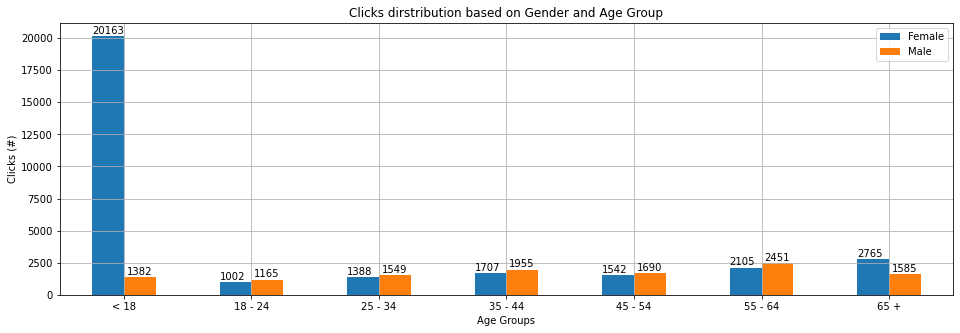

In [14]:
#Plotting the Click through rates based on Gender and Age Groups
plotdata = pd.DataFrame({'Female' : female_clicks, 'Male' : male_clicks})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Clicks dirstribution based on Gender and Age Group')
for i, v in enumerate(female_clicks) :
    ax.text(i - 0.250, v + 200, str(round(v, 1)))
for i, v in enumerate(male_clicks) :
    ax.text(i + 0.020, v + 200, str(round(v, 1)))
ax.set_xlabel('Age Groups')
ax.set_xticklabels(labels = labels, rotation = 360)
ax.set_ylabel('Clicks (#)')
print()

The above graph give fine grain information regarding the click rates of various age groups and their gender. We can observe that since females with age < 18 dominate the traffic, they form the majority of the click rates. However, let look at a different angle (without bias).

In [15]:
#Plotting the Click through ratios based on Age Group and Gender
female_ratio = []; male_ratio = []
for i in range(len(female_impressions)) :
    female_ratio.append(female_clicks[i] / female_impressions[i])
    male_ratio.append(male_clicks[i] / male_impressions[i])

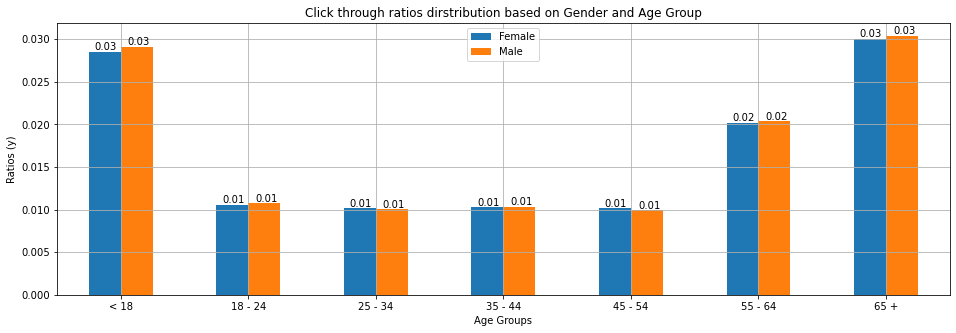

In [16]:
#Plotting the Click ratios based on Gender and Age Groups
plotdata = pd.DataFrame({'Female' : female_ratio, 'Male' : male_ratio})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Click through ratios dirstribution based on Gender and Age Group')
for i, v in enumerate(female_ratio) :
    ax.text(i - 0.205, v + 0.00020, str(round(v, 2)))
for i, v in enumerate(male_ratio) :
    ax.text(i + 0.055, v + 0.00020, str(round(v, 2)))
ax.set_xlabel('Age Groups')
ax.set_xticklabels(labels = labels, rotation = 360)
ax.set_ylabel('Ratios (y)')
print()

From the above graph we can conclude that, the ***click through ratios are same for both genders***. There is no favor here. However, it seems that Age Group < 18 and 65 + seems to like the Ads when compared to Other age groups.

With respect to the overall statistics, we can conclude that the Ad needs to be more attractive or relevant for both the population and all age groups to generate more revenue.

**Improvements:** 

1. Can imporve with keeping the females < 18 as the target audience age as they dominate the traffic. 
2. Need to be relevant because the ratio of (incoming vs clicks) is way less.


Furthermore, we can still analyze with respect to impressions and click through rate. But that is secondary because, first we need to be relevent and then we can improve the number of impressions to grow the click rate.

***To be honest, just increasing the number of impressions is a bad idea as it will be annoying to the consumer!*** Currently with respect to the above graph we can conclude that we are having good balance (same distribution) of impressions for the incoming traffic 

In [17]:
#Plotting the Signed In Impressions count based on Age Group and Gender
female_signed_impressions = df[(df['Gender'] == 0) & (df['Impressions'] != 0)& (df['Signed_In'] == 1)].groupby('Age_Group')['Impressions'].sum().values.tolist()
male_signed_impressions = df[(df['Gender'] == 1) & (df['Impressions'] != 0) & (df['Signed_In'] == 1)].groupby('Age_Group')['Impressions'].sum().values.tolist()

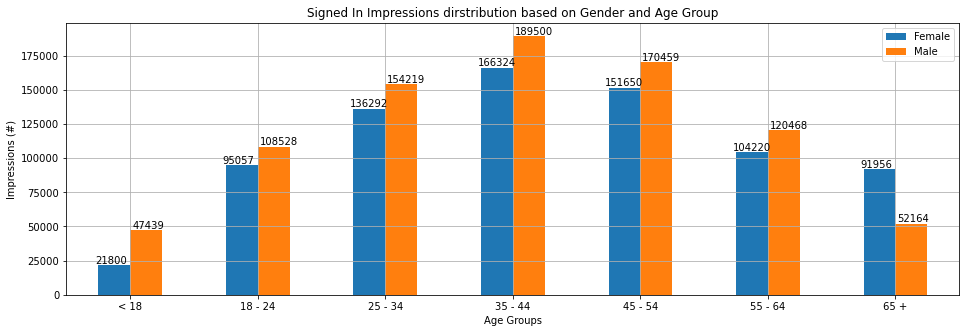

In [18]:
#Plotting the Signed In Impressions based on Gender and Age Groups
plotdata = pd.DataFrame({'Female' : female_signed_impressions, 'Male' : male_signed_impressions})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Signed In Impressions dirstribution based on Gender and Age Group')
for i, v in enumerate(female_signed_impressions) :
    ax.text(i - 0.275, v + 1000, str(round(v, 1)))
for i, v in enumerate(male_signed_impressions) :
    ax.text(i + 0.015, v + 1000, str(round(v, 1)))
ax.set_xlabel('Age Groups')
ax.set_xticklabels(labels = labels, rotation = 360)
ax.set_ylabel('Impressions (#)')
print()

In [19]:
#Plotting the Signed In Click through rates based on Age Group and Gender
female_signed_clicks = df[(df['Gender'] == 0) & (df['Clicks'] != 0) & (df['Signed_In'] == 1)].groupby('Age_Group')['Clicks'].sum().values.tolist()
male_signed_clicks = df[(df['Gender'] == 1) & (df['Clicks'] != 0) & (df['Signed_In'] == 1)].groupby('Age_Group')['Clicks'].sum().values.tolist()

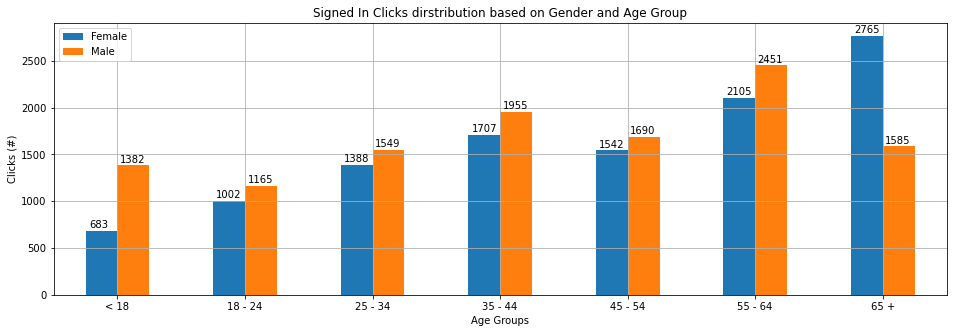

In [20]:
#Plotting the Signed In Click through rates based on Gender and Age Groups
plotdata = pd.DataFrame({'Female' : female_signed_clicks, 'Male' : male_signed_clicks})
ax = plotdata.plot(kind = 'bar',
                           grid = True,
                           legend = True,
                           figsize = (16, 5),
                           title = 'Signed In Clicks dirstribution based on Gender and Age Group')
for i, v in enumerate(female_signed_clicks) :
    ax.text(i - 0.225, v + 30, str(round(v, 1)))
for i, v in enumerate(male_signed_clicks) :
    ax.text(i + 0.020, v + 30, str(round(v, 1)))
ax.set_xlabel('Age Groups')
ax.set_xticklabels(labels = labels, rotation = 360)
ax.set_ylabel('Clicks (#)')
print()

***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***

We analyzed just one file, but the dataset includes 31 files. You can easily aggregate the results into one dataframe as shown below. 

In [21]:
import glob #Reading multiple files
files = glob.glob('Datasets/nyt*.csv')
temp_dfs = []
for file in files:
    temp_df = pd.read_csv(file)
    temp_df['filename'] = file
    temp_dfs.append(temp_df)
group_df = pd.concat(temp_dfs, ignore_index = True)
group_df

,Age,Gender,Impressions,Clicks,Signed_In,filename
0,63,1,2,0,1,Datasets/nyt17.csv
1,0,0,7,0,0,Datasets/nyt17.csv
2,0,0,8,0,0,Datasets/nyt17.csv
3,0,0,4,0,0,Datasets/nyt17.csv
4,61,1,6,0,1,Datasets/nyt17.csv
...,...,...,...,...,...,...
14905860,36,1,5,0,1,Datasets/nyt11.csv
14905861,38,0,3,0,1,Datasets/nyt11.csv
14905862,0,0,8,0,0,Datasets/nyt11.csv
14905863,31,1,5,0,1,Datasets/nyt11.csv


Analyze trends over time since we now have a historic view of the data over 31 days. You can examine how clicks or impresssions change over time by using the filename as the date field. 

In [22]:
dates = ['Datasets/nyt1.csv', 'Datasets/nyt2.csv', 'Datasets/nyt3.csv', 'Datasets/nyt4.csv', 'Datasets/nyt5.csv', 'Datasets/nyt6.csv', 'Datasets/nyt7.csv', 'Datasets/nyt8.csv', 'Datasets/nyt9.csv', 'Datasets/nyt10.csv',
        'Datasets/nyt11.csv', 'Datasets/nyt12.csv', 'Datasets/nyt13.csv', 'Datasets/nyt14.csv', 'Datasets/nyt15.csv', 'Datasets/nyt16.csv', 'Datasets/nyt17.csv', 'Datasets/nyt18.csv', 'Datasets/nyt19.csv', 'Datasets/nyt20.csv',
        'Datasets/nyt21.csv', 'Datasets/nyt22.csv', 'Datasets/nyt23.csv', 'Datasets/nyt24.csv', 'Datasets/nyt25.csv', 'Datasets/nyt26.csv', 'Datasets/nyt27.csv', 'Datasets/nyt28.csv', 'Datasets/nyt29.csv', 'Datasets/nyt30.csv',
        'Datasets/nyt31.csv']

local_dates = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10',
               'Day 11', 'Day 12', 'Day 13', 'Day 14', 'Day 15', 'Day 16', 'Day 17', 'Day 18', 'Day 19', 'Day 20',
               'Day 21', 'Day 22', 'Day 23', 'Day 24', 'Day 25', 'Day 26', 'Day 27', 'Day 28', 'Day 29', 'Day 30',
               'Day 31']

In [23]:
#Calculating the end of day impressions, clicks and ratios
num_impressions = []
num_clicks = []
num_ratios = []

for i in range(len(dates)) : 
    num_impressions.append(group_df[group_df['filename'] == dates[i]]['Impressions'].sum())
    num_clicks.append(group_df[group_df['filename'] == dates[i]]['Clicks'].sum())   
    num_ratios.append(num_clicks[i] / num_impressions[i])

print(len(num_impressions), len(num_clicks), len(num_ratios))

31 31 31


In [24]:
#Plotting function for histogram based on Days
def Plot_Day_Hist_Distribution(target) : 

    num_plots = 0
    figure, axis = plt.subplots(11, 3)
    plt.subplots_adjust(hspace = 1, wspace= 0.25)

    for i in range(11) :
        for j in range (3) : 
            ax = group_df[group_df['filename'] == dates[num_plots]][target].plot(kind = 'hist',
                                         ax = axis[i, j],
                                         grid = True,
                                         legend = True, 
                                         figsize = (30, 50),
                                         title = 'Distribution of ' + target + ' on Day ' + str(num_plots + 1))

            ax.set_xlabel(target)
            ax.set_ylabel('Frequency (#)')

            num_plots += 1
            if num_plots == len(dates) : break
                
    figure.delaxes(axis[10][1])    
    figure.delaxes(axis[10][2])

In [25]:
#Plotting function for bar graph based on Days
def Plot_Day_Bar_Distribution(target) : 
    
    num_plots = 0
    figure, axis = plt.subplots(11, 3)
    plt.subplots_adjust(hspace = 1, wspace= 0.25)

    for i in range(11) :
        for j in range (3) : 
            ax = group_df[group_df['filename'] == dates[num_plots]][target].value_counts().sort_index().plot(kind = 'bar',
                                         ax = axis[i, j],
                                         grid = True,
                                         legend = True, 
                                         figsize = (30, 50),
                                         title = 'Distribution of ' + target + ' on Day ' + str(num_plots + 1))

            for index, v in enumerate(group_df[group_df['filename'] == dates[num_plots]][target].value_counts().sort_index()) :
                ax.text(index - 0.125, v + 1000, str(round(v, 2)))

            
            ax.set_xlabel(target)
            if target == 'Ratios' : ax.set_ylabel('Ratios (%)')
            else : ax.set_ylabel('Frequency (#)')

            num_plots += 1
            if num_plots == len(dates) : break
                
    figure.delaxes(axis[10][1])    
    figure.delaxes(axis[10][2])

In [26]:
#Plotting function for Summarized graphs based on Days
def Plot_Day_Bar_Analysis(target, counts) :
    
    figure, axis = plt.subplots(2)
    plotdata = pd.DataFrame({target : counts})
    plt.subplots_adjust(hspace = 0.75, wspace= 0.25)
    
    ax = plotdata.plot(kind = 'bar',
                  ax = axis[0],
                  grid = True,
                  legend = True,
                  figsize = (15, 8),
                  title = 'Day based ' + target + ' distribution')
    
    ax.set_xlabel('Days')
    if target == 'Ratios' : ax.set_ylabel(target + ' (%)')
    else : ax.set_ylabel(target + ' (#)')
    ax.set_xticklabels(labels = local_dates)
    
    ax = plotdata.plot(kind = 'line',
                       ax = axis[1],
                       grid = True,
                       legend = True,
                       figsize = (15, 8),
                       title = 'Day based ' + target + ' distribution')
    
    ax.scatter([i for i in range(31)], counts, marker='*', color='r')
    
    ax.set_xlabel('Days')
    if target == 'Ratios' : ax.set_ylabel(target + ' (%)')
    else : ax.set_ylabel(target + ' (#)')

    print()

In [27]:
#Simple Statistical Inference from end of day data
def Analysis_Stats(target, counts, total = 1) : 
    if total : print('Total Number of ' + target + ' in May : ', sum(counts))
    print('Average Number of ' + target + ' per day : ', round(np.mean(counts), 2))
    print('Minimum Number of ' + target + ' achieved on ', local_dates[counts.index(min(counts))])
    print('Maximum Number of ' + target + ' achieved on ', local_dates[counts.index(max(counts))])

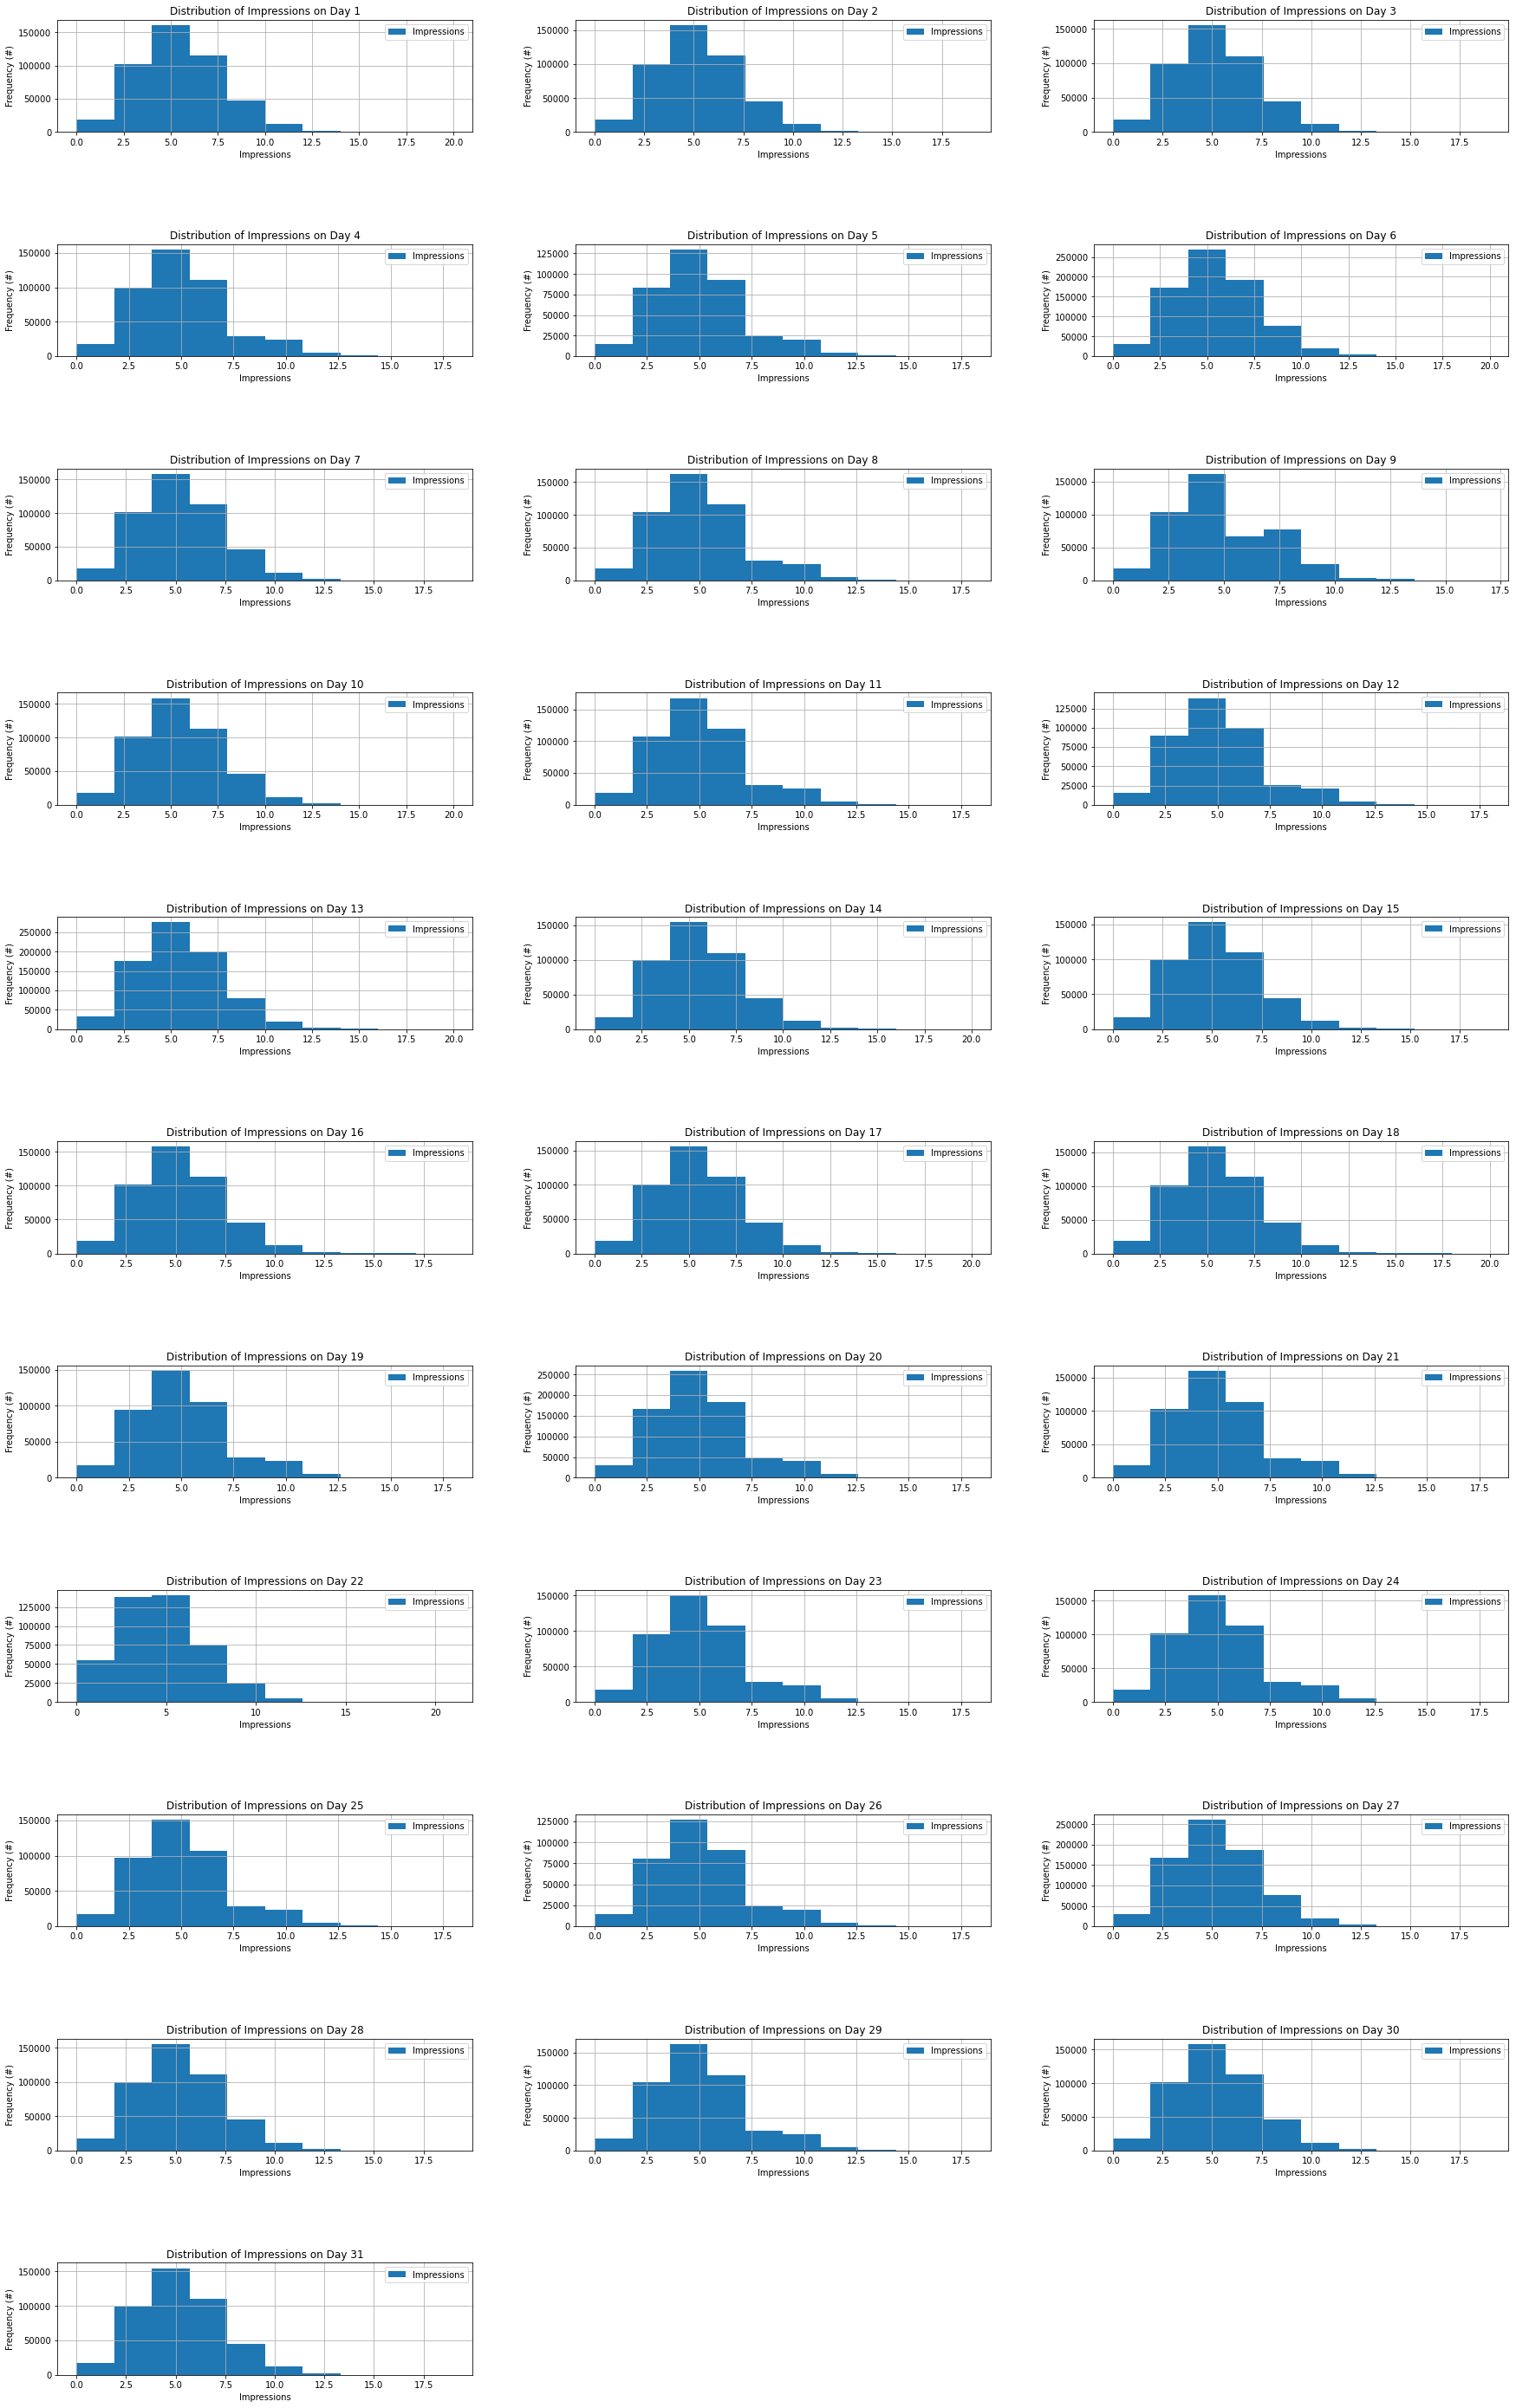

In [28]:
Plot_Day_Hist_Distribution('Impressions')


Total Number of Impressions in May :  74522068
Average Number of Impressions per day :  2403937.68
Minimum Number of Impressions achieved on  Day 26
Maximum Number of Impressions achieved on  Day 13


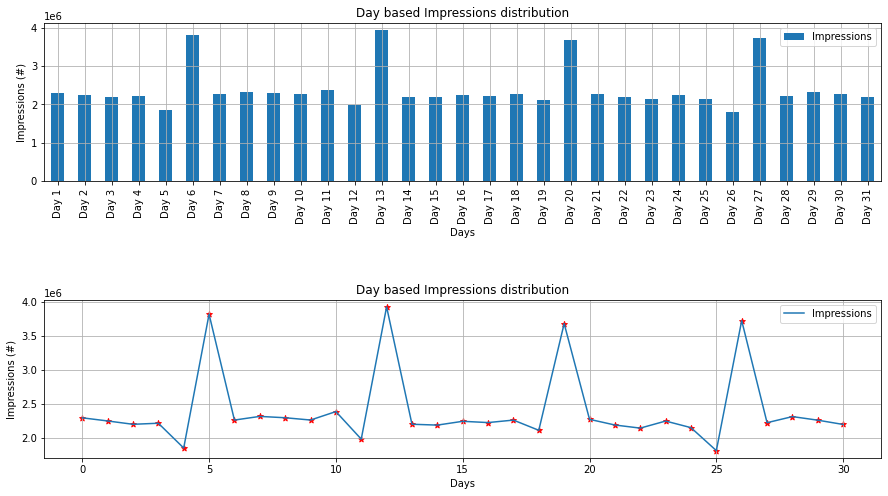

In [29]:
#Summarizing day-wise impressions distribution
Plot_Day_Bar_Analysis('Impressions', num_impressions)
Analysis_Stats('Impressions', num_impressions)

I can conclude that Impressions follow a uniform distribution (almost) accross various days. There are certain spikes which can be due to certain events that took place during that day. Like an interesting news, a sports event, or an holiday. In our case, the spikes happen during Sundays, This can be because there traffic is high on the weekend. So other than that, There seems to be an ***uniform distribution.***

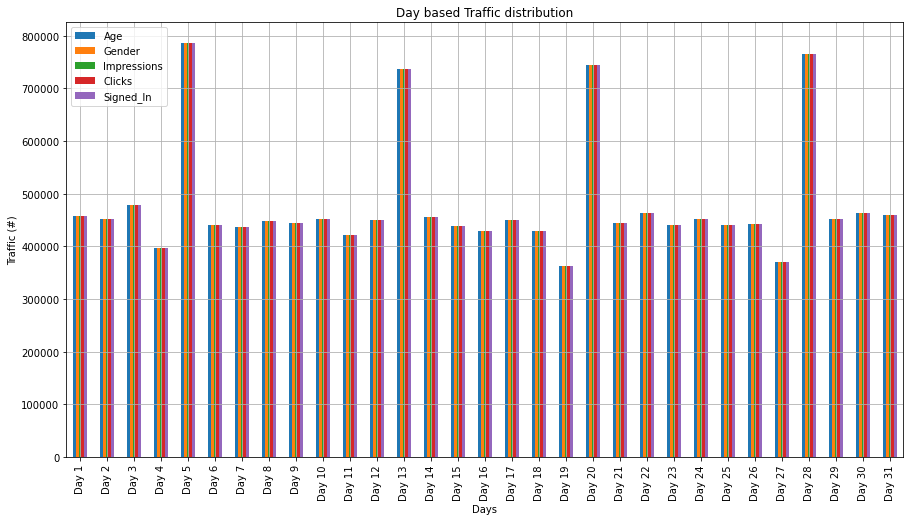

In [30]:
#Let's try to prove our inference
ax = group_df.groupby('filename').agg('count').plot(kind = 'bar',
                  grid = True,
                  legend = True,
                  figsize = (15, 8),
                  title = 'Day based Traffic distribution')
    
ax.set_xlabel('Days')
ax.set_ylabel('Traffic (#)')
ax.set_xticklabels(labels = local_dates)
print()

From the above graph, We can bolster our previous point. The ***publisher increases the Ad impressions during Sundays due to increased traffic*** to increase Ad revenue

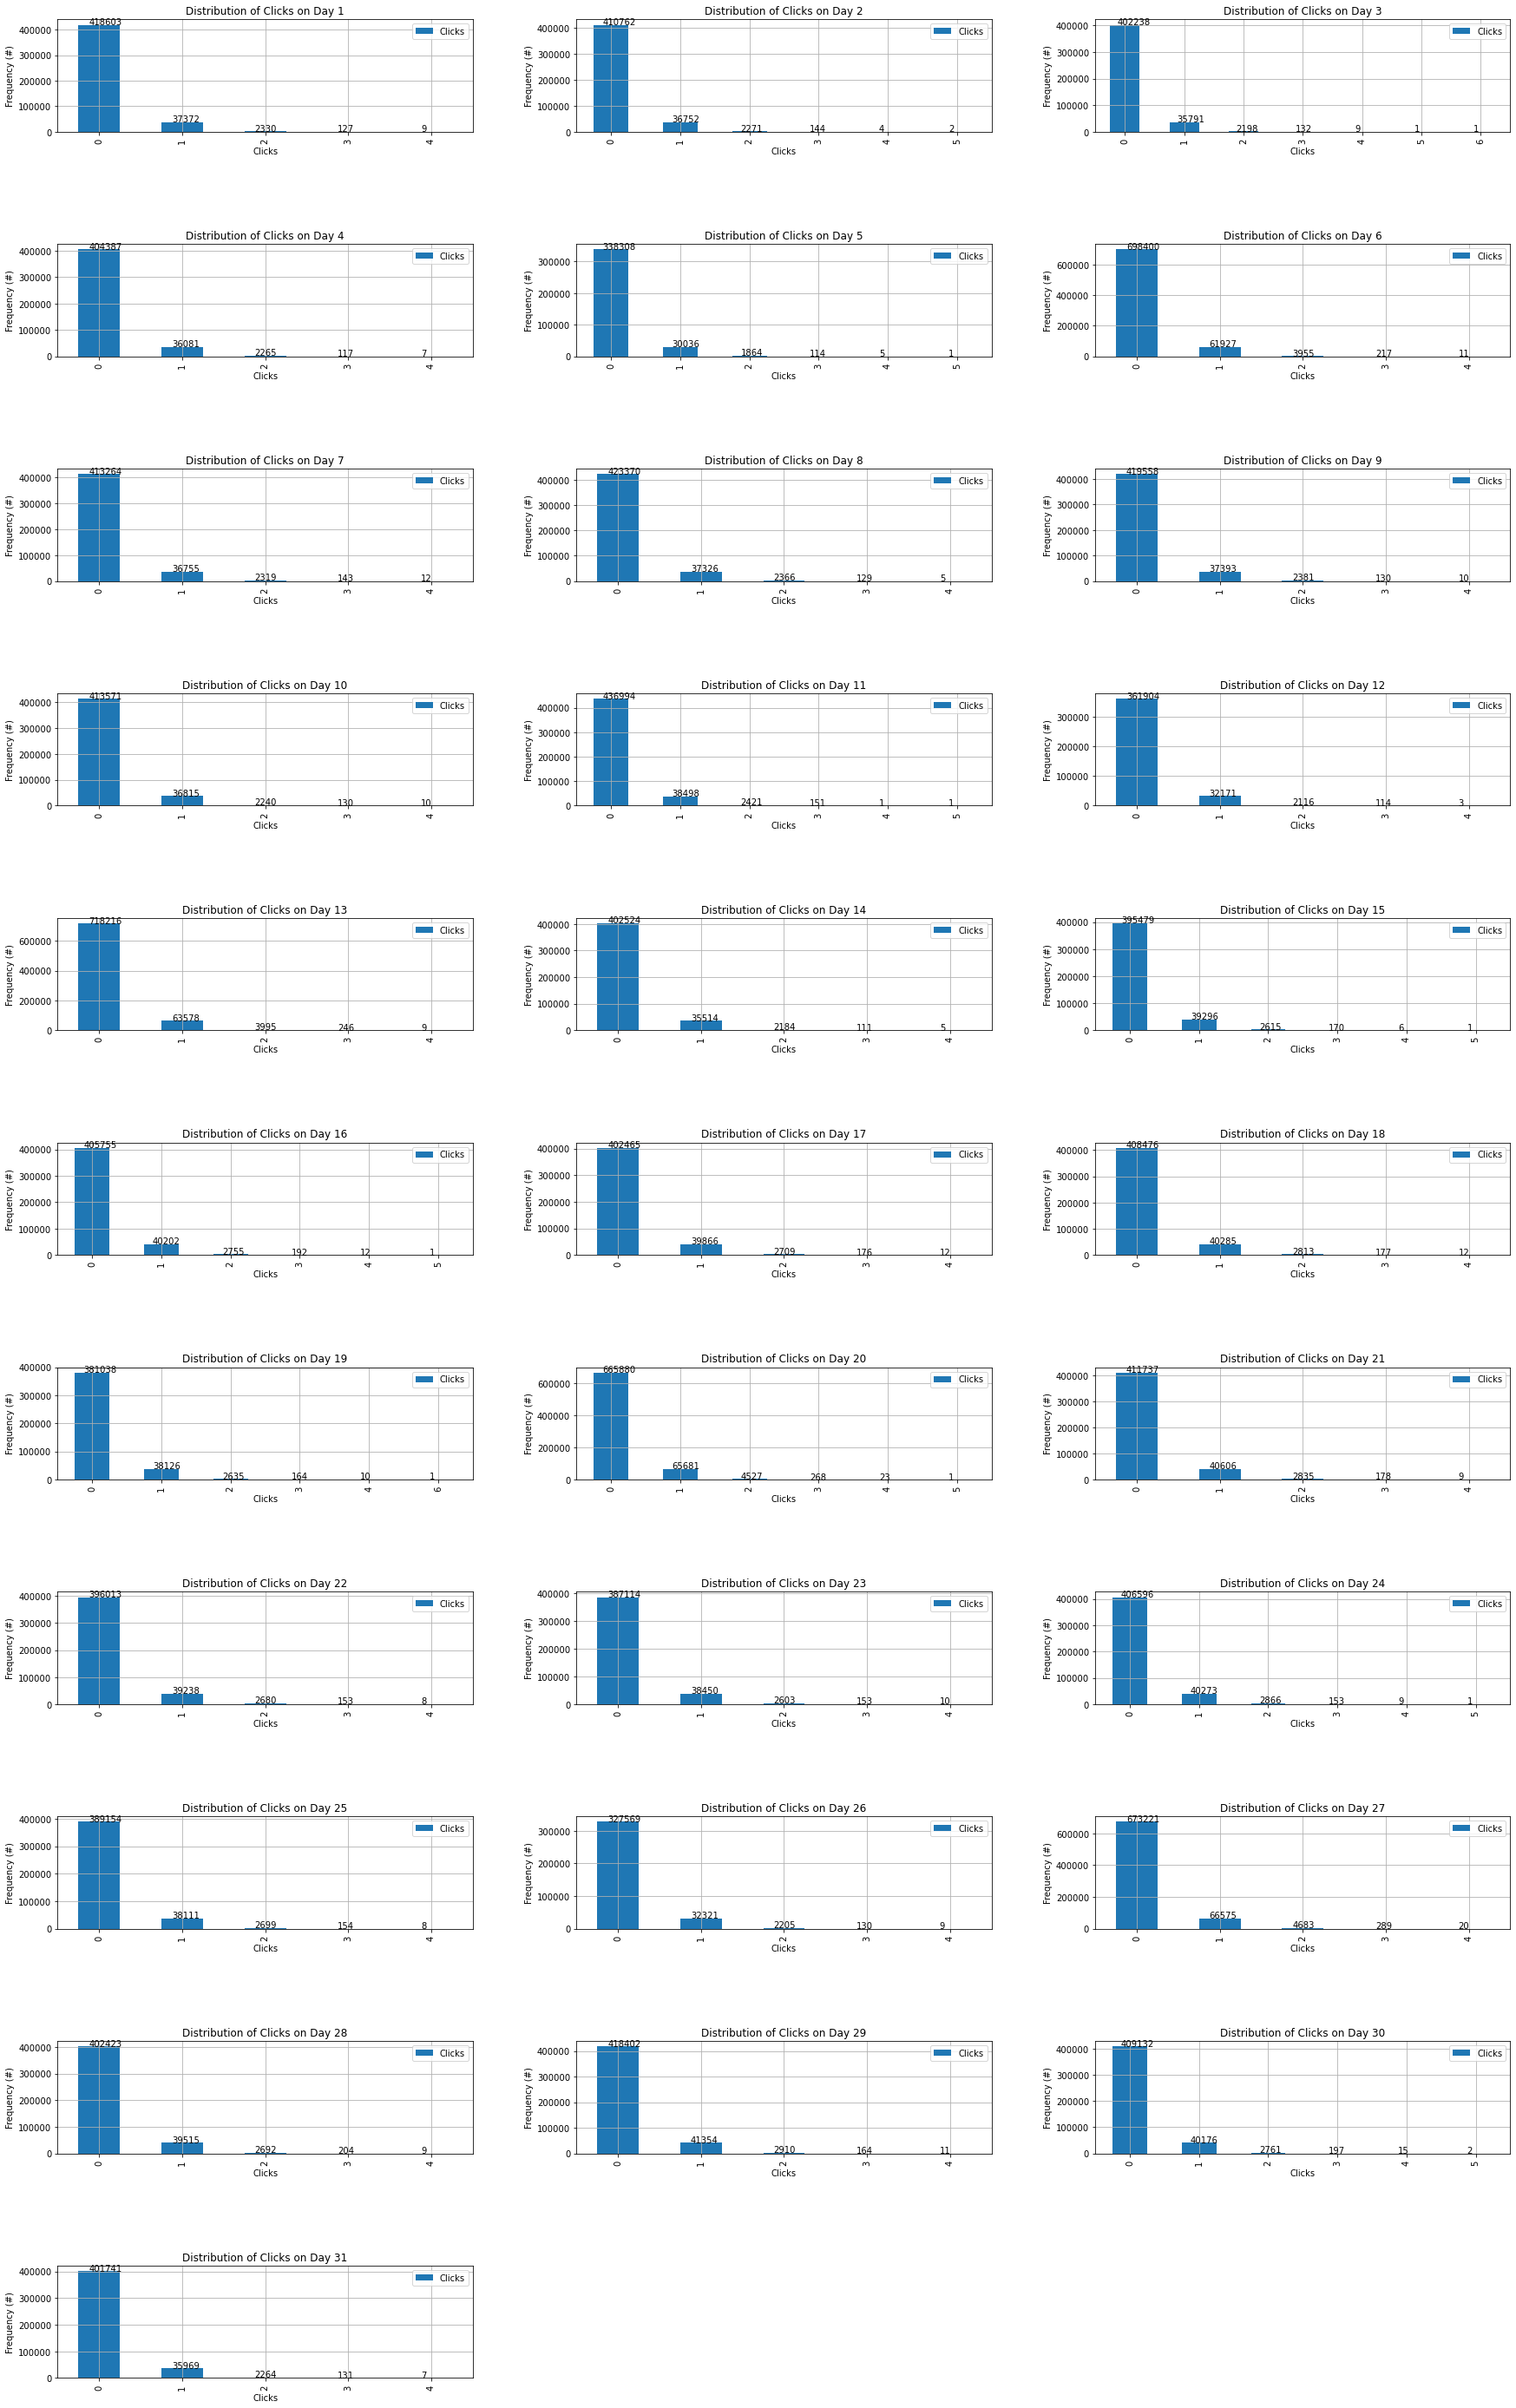

In [31]:
Plot_Day_Bar_Distribution('Clicks')


Total Number of Clicks in May :  1456768
Average Number of Clicks per day :  46992.52
Minimum Number of Clicks achieved on  Day 5
Maximum Number of Clicks achieved on  Day 27


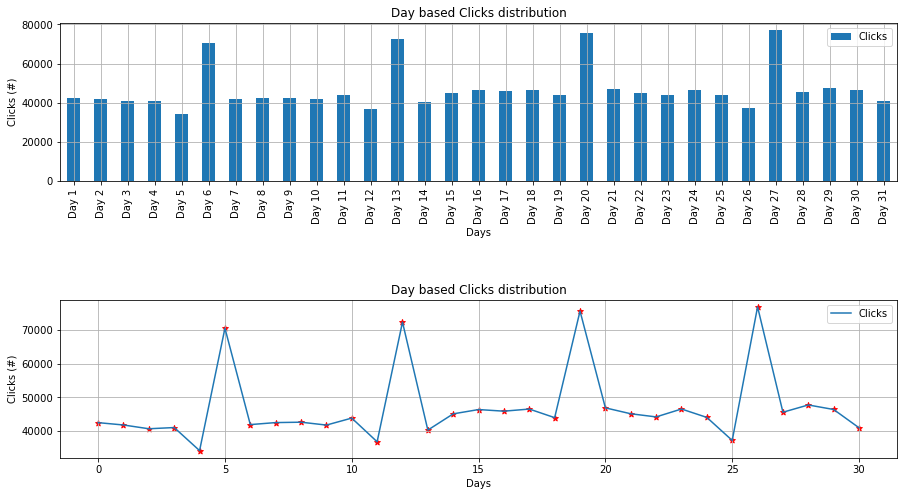

In [32]:
Plot_Day_Bar_Analysis('Clicks', num_clicks)
Analysis_Stats('Clicks', num_clicks)

From the above analysis, we can reinforce the previous conclutions. 

1. Yes, the spike in the clicks is due to increased impressions and traffic during Sundays.
2. It follows the same distribution (uniform) as impressions. This is because it is ***directly related*** to each other. If there are no impressions then there cannot be a Ad click
3. The Ad shown in the portal is less relevant/not attractive enough for the current traffic


Average Number of Ratios per day :  0.02
Minimum Number of Ratios achieved on  Day 14
Maximum Number of Ratios achieved on  Day 19


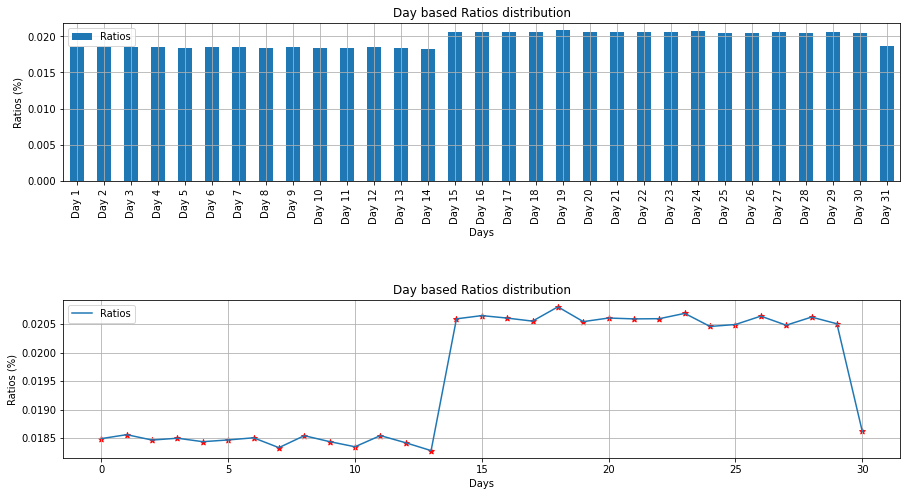

In [33]:
Plot_Day_Bar_Analysis('Ratios', num_ratios)
Analysis_Stats('Ratios', num_ratios, total = 0)

The above observation is click to impression ratio. It shows number of positive impressions. We can conclude that at the current rate, at max we are getting ***2% which can be improved by identifying the target audience and tailoring the Ads for them***.

***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***